## System setup

---


##### Importing modules


In [1]:
import os
import gc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 16})

import cv2 as cv

from tensorflow.keras.layers import (
    Rescaling,
    Conv2D,
    AveragePooling2D,
    MaxPooling2D,
    BatchNormalization,
    Dropout,
    Flatten,
    Dense,
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from tqdm import tqdm, trange

from toolkit.classes import DataSet, ImageProcessor, Augmenter, Model

2023-01-06 16:44:15.409695: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 16:44:15.581084: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/demust/py39/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-06 16:44:15.581112: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-06 16:44:16.300289: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror:

## Read dataset

---


##### Create image dataframe


In [2]:
images = DataSet()

In [3]:
datasets = ["raw", "data", "augmented", "preprocessed"]
for dataset in datasets:
    images.update_dataset(dataset=dataset)


Found 150 images in ./raw/Train/Non defective/
Found 150 images in ./raw/Train/Defective/
Found 31 images in ./raw/Validation/Non defective/
Found 31 images in ./raw/Validation/Defective/
Found 11 images in ./raw/Test/Non defective/
Found 11 images in ./raw/Test/Defective/
Found 150 images in ./data/Train/Non defective/
Found 150 images in ./data/Train/Defective/
Found 31 images in ./data/Validation/Non defective/
Found 31 images in ./data/Validation/Defective/
Found 11 images in ./data/Test/Non defective/
Found 11 images in ./data/Test/Defective/
Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/
Found 175 images in ./preprocessed/Train/Non defective/
Found 175 images in ./preprocessed/Train/Defective/
Found 31 images in ./preprocessed/Validation/Non defective/
Found 31 images in ./preprocessed/Validation/Defective/
Found 11 images in ./preprocessed/Test/Non defective/
Found 11 images in ./preprocessed/Test/Defective/


## Data augmentation

---


In [4]:
N_augmented = 25

image_augmenter = Augmenter(N_augmented, images.data)
image_augmenter.remove_old_data(images.augmented_folder)
image_augmenter.augment_images()
del image_augmenter
images.update_dataset("augmented")
images.augmented


100%|██████████| 2/2 [00:20<00:00, 10.39s/it]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


,type,defect,defect_str,path,filename,img,height,width,components,R_mean,G_mean,B_mean
0,train,0,Non defective,./augmented/Train/Non defective/,83_augmented.jpg,./augmented/Train/Non defective/83_augmented.jpg,0,0,0,0.0,0.0,0.0
1,train,0,Non defective,./augmented/Train/Non defective/,11_augmented.jpg,./augmented/Train/Non defective/11_augmented.jpg,0,0,0,0.0,0.0,0.0
2,train,0,Non defective,./augmented/Train/Non defective/,0_augmented.jpg,./augmented/Train/Non defective/0_augmented.jpg,0,0,0,0.0,0.0,0.0
3,train,0,Non defective,./augmented/Train/Non defective/,120_augmented.jpg,./augmented/Train/Non defective/120_augmented.jpg,0,0,0,0.0,0.0,0.0
4,train,0,Non defective,./augmented/Train/Non defective/,102_augmented.jpg,./augmented/Train/Non defective/102_augmented.jpg,0,0,0,0.0,0.0,0.0
5,train,0,Non defective,./augmented/Train/Non defective/,9_augmented.jpg,./augmented/Train/Non defective/9_augmented.jpg,0,0,0,0.0,0.0,0.0
6,train,0,Non defective,./augmented/Train/Non defective/,138_augmented.jpg,./augmented/Train/Non defective/138_augmented.jpg,0,0,0,0.0,0.0,0.0
7,train,0,Non defective,./augmented/Train/Non defective/,21_augmented.jpg,./augmented/Train/Non defective/21_augmented.jpg,0,0,0,0.0,0.0,0.0
8,train,0,Non defective,./augmented/Train/Non defective/,65_augmented.jpg,./augmented/Train/Non defective/65_augmented.jpg,0,0,0,0.0,0.0,0.0
9,train,0,Non defective,./augmented/Train/Non defective/,112_augmented.jpg,./augmented/Train/Non defective/112_augmented.jpg,0,0,0,0.0,0.0,0.0


## Image processing

---


In [10]:
img_height = 128
img_width = 128

preprocessing_steps = [
    "original",
    "crop",
    "grayscale",
    "hist_eq",
    "noise_filt",
    "resize",
    "save",
]

preprocessing_kwargs = {
    "crop": {"ratio": 0.1},
    "resize": {"height": img_height, "width": img_width},
    "hist_eq": {
        "type": "CLAHE",
        "size": (16, 16),
    },
    "noise_filt": {"type": "median", "size": 11},
    "Laplacian": {"size": 5},
    "Canny": {"low": 100, "high": 200},
    "Hough": {"minLineLength": 10, "maxLineGap": 20},
    "feat_detect": {"type": "ORB"},
}


In [5]:
image_processor = ImageProcessor(steps=preprocessing_steps, kwargs=preprocessing_kwargs)
image_processor.remove_old_data(images.preprocessed_folder)
image_processor.process_images(images.data)
image_processor.process_images(images.augmented)
del image_processor


384it [03:38,  1.75it/s]
50it [00:26,  1.87it/s]


## Model build

---


##### Construct neural network


In [11]:
CNN = Model('LeNet-5', img_height, img_width)

CNN.epochs = 100
CNN.batch_size = 32

CNN.model = Sequential(
    [
        Rescaling(1.0 / 255, input_shape=(img_height, img_width, 1)),
        Conv2D(
            6, 5, strides=(1, 1), padding="valid", activation="tanh"
        ),
        AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        Conv2D(
            16, 5, strides=(1, 1), padding="valid", activation="tanh"
        ),
        AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        Flatten(),
        Dense(units=120, activation="tanh"),
        Dense(units=84, activation="tanh"),
        Dense(1, activation="sigmoid"),
    ]
)

CNN.setup_neural_net()
CNN.model.summary()


Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 1)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 6)       156       
                                                                 
 average_pooling2d_2 (Averag  (None, 62, 62, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 29, 29, 16)       0         
 ePooling2D)                                                     
  

##### Train


In [12]:
CNN.train_net()


Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 1.2071 - accuracy: 0.5057
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./model/LeNet-5.h5
11/11 [==============================] - 3s 172ms/step - loss: 1.2071 - accuracy: 0.5057 - val_loss: 0.6998 - val_accuracy: 0.5000
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 0.7218 - accuracy: 0.4771
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 2s 148ms/step - loss: 0.7218 - accuracy: 0.4771 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 0.6977 - accuracy: 0.5286
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 2s 150ms/step - loss: 0.6977 - accuracy: 0.5286 - val_loss: 0.7152 - val_accuracy: 0.5000
Epoch 4/100
11/11 [==============================] - ETA: 0s - loss: 0.7023 - accuracy: 0.5057
Epoch 4: val_accuracy did not improve

##### Predict


In [13]:
CNN.predict_test()


1/1 [==============================] - 0s 147ms/step
Test values:          [1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1]
Predicted values:     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


##### Metrics


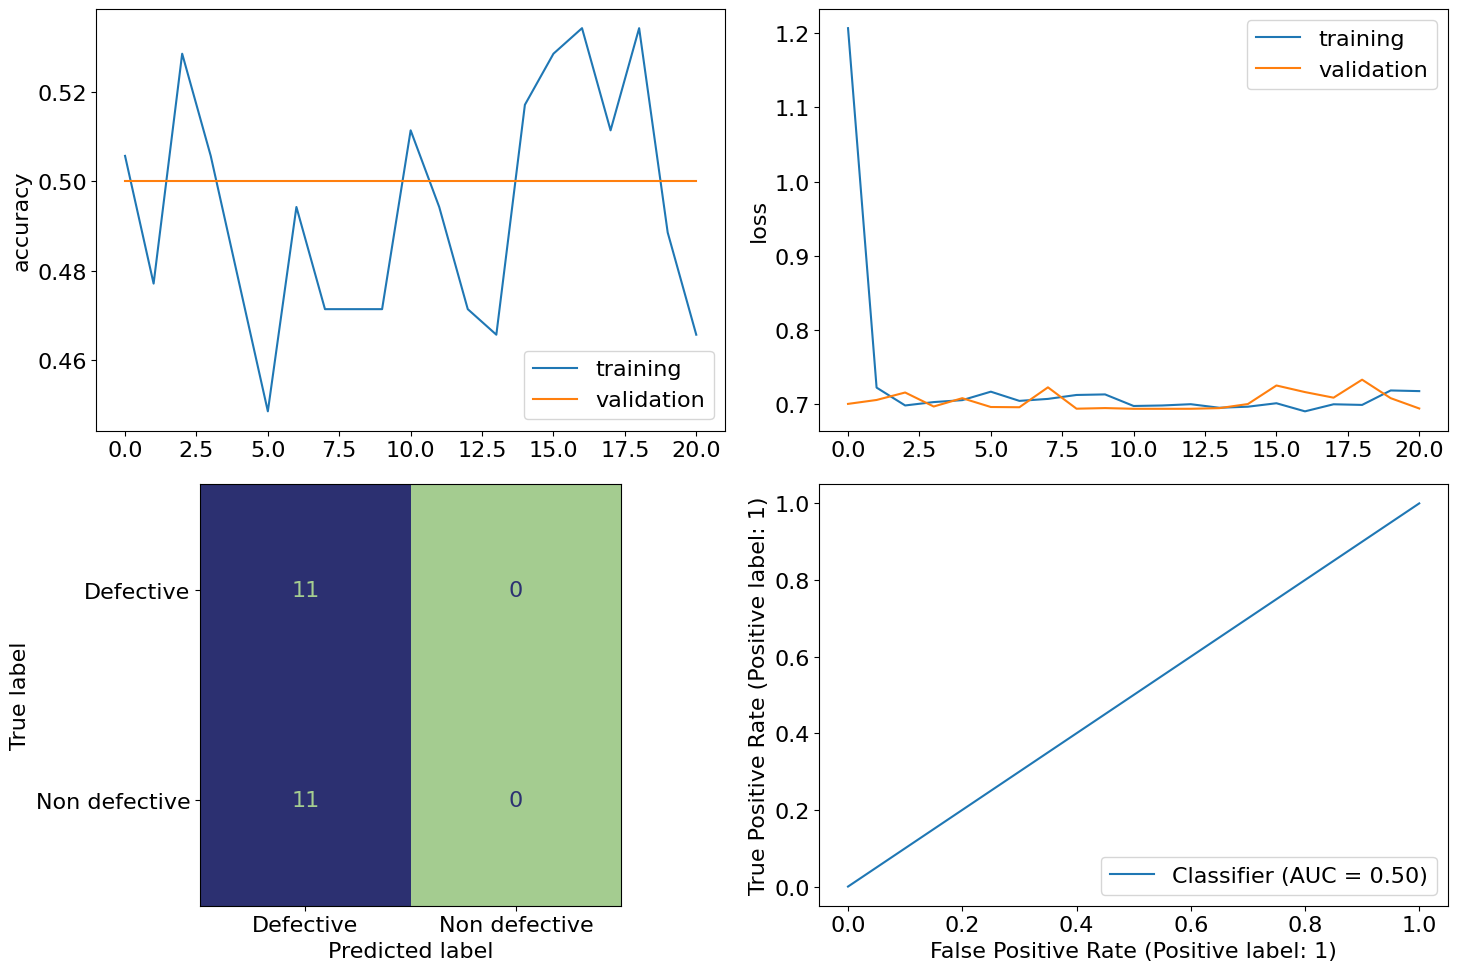

In [14]:
CNN.show_metrics()
